Notebook for producing visuals

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Read in the characteristics of business owners data

In [2]:
cbo_df = pd.read_csv('characteristics_of_business_owners.csv')

Filter to only the question pertaining to firm owner's educational attainment, then filter race and sex so to get only "All owners of respondent firms"

In [3]:
owner_educ_industry = cbo_df.loc[cbo_df['QDESC_LABEL'] == 'EDUC']

owner_educ_industry = owner_educ_industry.loc[owner_educ_industry['OWNER_RACE'] == 0].loc[owner_educ_industry['OWNER_SEX'] == 1]
owner_educ_industry.head(15)

,Unnamed: 0,NAICS2017,NAICS2017_LABEL,QDESC,QDESC_LABEL,OWNER_RACE,OWNER_RACE_LABEL,OWNER_SEX,OWNER_SEX_LABEL,OWNCHAR,OWNCHAR_LABEL,OWNPDEMP,OWNPDEMP_PCT
336,337,00,Total for all sectors,O07,EDUC,0,All owners of respondent firms,1,All owners of respondent firms,DM,Less than high school graduate,110743,2.7
337,338,00,Total for all sectors,O07,EDUC,0,All owners of respondent firms,1,All owners of respondent firms,DN,High school graduate - diploma or GED,791649,19.3
338,339,00,Total for all sectors,O07,EDUC,0,All owners of respondent firms,1,All owners of respondent firms,DO,"Technical, trade, or vocational school",229223,5.6
339,340,00,Total for all sectors,O07,EDUC,0,All owners of respondent firms,1,All owners of respondent firms,DP,"Some college, but no degree",583812,14.3
340,341,00,Total for all sectors,O07,EDUC,0,All owners of respondent firms,1,All owners of respondent firms,DQ,Associate degree,229161,5.6
341,342,00,Total for all sectors,O07,EDUC,0,All owners of respondent firms,1,All owners of respondent firms,DR,Bachelor's degree,1232195,30.1
342,343,00,Total for all sectors,O07,EDUC,0,All owners of respondent firms,1,All owners of respondent firms,DS1,Master's degree,376334,9.2
343,344,00,Total for all sectors,O07,EDUC,0,All owners of respondent firms,1,All owners of respondent firms,DS2,Doctorate degree,77752,1.9
344,345,00,Total for all sectors,O07,EDUC,0,All owners of respondent firms,1,All owners of respondent firms,DS3,Professional degree beyond a bachelor's degree,463423,11.3
345,346,00,Total for all sectors,O07,EDUC,0,All owners of respondent firms,1,All owners of respondent firms,DT,Total reporting,4094288,100.0


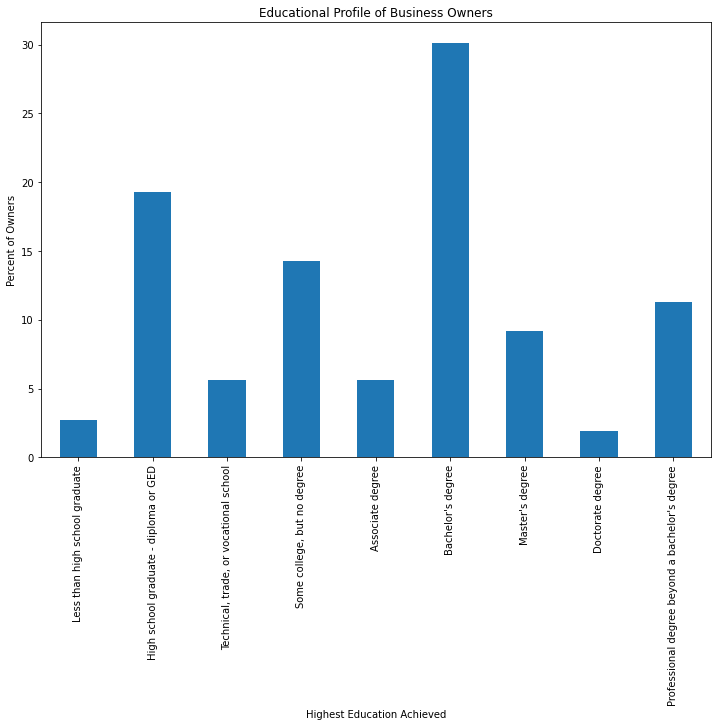

In [4]:
owner_educ_overall_profile = owner_educ_industry[['OWNCHAR_LABEL', 'OWNPDEMP_PCT']].loc[owner_educ_industry['NAICS2017'] == '00']
owner_educ_overall_profile = owner_educ_overall_profile.set_index(owner_educ_overall_profile['OWNCHAR_LABEL'])['OWNPDEMP_PCT'].drop(index=['Total reporting', 'Item not reported'])

plt.figure(figsize=(12, 8))
owner_educ_overall_profile.plot.bar()

plt.xlabel("Highest Education Achieved")
plt.ylabel("Percent of Owners")
plt.title("Educational Profile of Business Owners")
plt.show()

In [5]:
educ_industry_pivot = owner_educ_industry.pivot(columns='NAICS2017_LABEL', index='OWNCHAR_LABEL', values='OWNPDEMP_PCT')
educ_industry_pivot = educ_industry_pivot.drop(columns='Total for all sectors', index=['Item not reported', 'Total reporting'])

educ_industry_pivot

NAICS2017_LABEL,Accommodation and food services,Administrative and support and waste management and remediation services,"Agriculture, forestry, fishing and hunting","Arts, entertainment, and recreation",Construction,Educational services,Finance and insurance,Health care and social assistance,Industries not classified,Information,Management of companies and enterprises,Manufacturing,"Mining, quarrying, and oil and gas extraction",Other services (except public administration),"Professional, scientific, and technical services",Real estate and rental and leasing,Retail trade,Transportation and warehousing,Utilities,Wholesale trade
OWNCHAR_LABEL,,,,,,,,,,,,,,,,,,,,
Associate degree,6.2,7.3,6.3,5.0,6.6,5.7,5.2,2.9,10.0,4.1,2.1,6.4,4.8,7.5,3.4,5.6,6.7,6.8,6.1,5.9
Bachelor's degree,30.0,30.7,25.1,42.8,19.8,38.0,52.2,11.2,24.1,49.3,48.0,30.9,39.1,19.6,37.0,42.8,31.7,20.6,30.1,42.0
Doctorate degree,1.0,0.5,0.0,1.5,0.1,5.3,0.9,7.8,0.5,2.8,1.0,1.2,0.6,0.5,3.0,1.1,1.0,0.3,0.5,1.1
High school graduate - diploma or GED,28.2,24.0,34.1,15.5,33.7,10.3,8.9,2.9,29.7,9.2,13.9,24.4,26.2,28.6,4.7,13.5,25.6,36.3,23.8,18.3
Less than high school graduate,5.5,4.0,5.3,1.6,4.6,0.2,0.4,0.4,3.8,0.9,0.7,3.0,3.8,4.3,0.4,1.9,3.4,5.6,2.2,1.7
Master's degree,7.6,7.3,4.7,11.6,3.5,21.7,12.5,11.4,5.8,15.5,13.8,8.0,4.5,3.8,16.5,11.6,6.6,4.3,8.6,8.8
Professional degree beyond a bachelor's degree,1.9,2.2,2.4,3.6,0.6,3.3,4.2,58.3,1.2,3.7,6.3,1.6,1.1,1.3,25.0,4.4,2.3,1.2,2.9,1.8
"Some college, but no degree",15.6,18.5,14.9,15.8,18.8,12.5,14.1,3.9,15.4,12.2,12.3,16.4,17.2,17.3,8.3,15.8,18.0,17.8,20.8,16.0
"Technical, trade, or vocational school",4.1,5.5,6.8,2.6,12.2,2.9,1.4,1.2,9.6,2.3,1.9,8.1,2.8,17.2,1.6,3.3,4.8,7.1,5.1,4.4


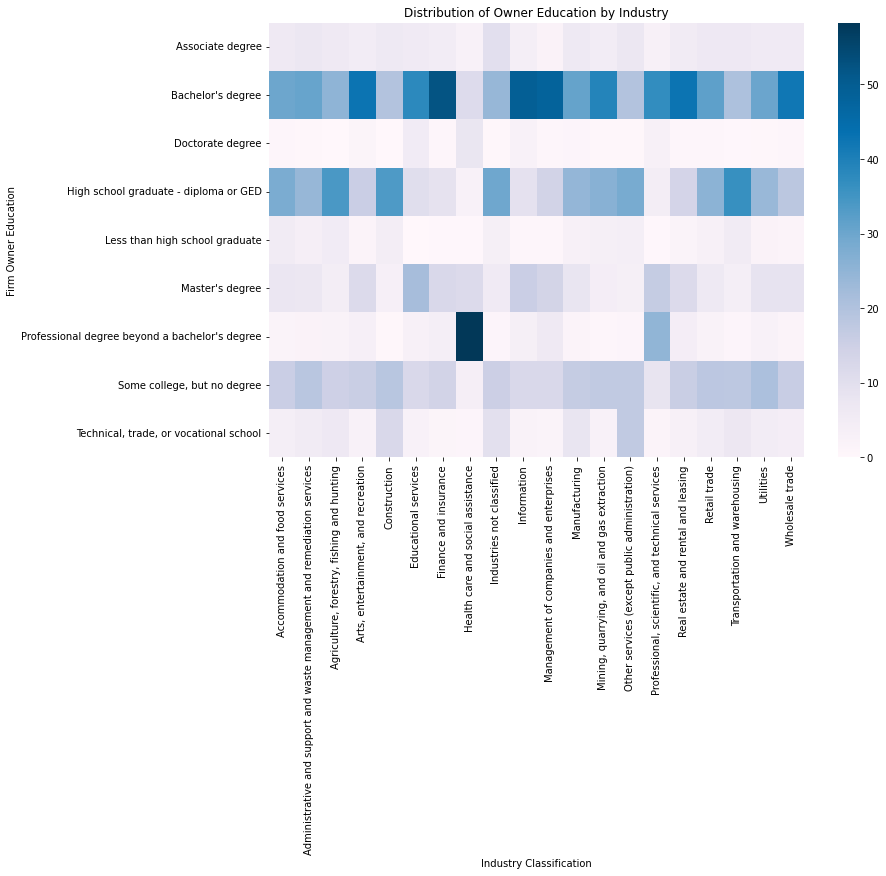

In [6]:
# sns.set_theme(style='whitegrid', palette='PuBu')
plt.figure(figsize=(12, 8))
sns.heatmap(educ_industry_pivot, cmap='PuBu').set(title="Distribution of Owner Education by Industry")

plt.xlabel("Industry Classification")
plt.ylabel("Firm Owner Education")

plt.show()

For scatter plot, work from merged_data

In [7]:
owners_and_firms = pd.read_csv("merged_data.csv")

C:\Users\test\AppData\Local\Temp\ipykernel_12880\2636411382.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  owners_and_firms = pd.read_csv("merged_data.csv")


In [8]:
scatter_data = owners_and_firms.loc[owners_and_firms['CBO_QDESC_LABEL'] == 'EDUC'].loc[owners_and_firms['CB_QDESC_LABEL'] == 'OWNRNUM'].loc[owners_and_firms['OWNER_RACE'] == 0].loc[owners_and_firms['OWNER_SEX'] == 1].loc[owners_and_firms['BUSCHAR'] == 'A1']
scatter_data = scatter_data[(scatter_data['OWNCHAR_LABEL'] == "Master's degree") | (scatter_data['OWNCHAR_LABEL'] == "Doctorate degree") | (scatter_data['OWNCHAR_LABEL'] == "Professional degree beyond a bachelor's degree")]
scatter_data = scatter_data[['NAICS2017_LABEL', 'OWNPDEMP_PCT', 'FIRMPDEMP', 'EMP']].groupby('NAICS2017_LABEL').sum()
scatter_data['EMP_PER_FIRM'] = scatter_data['EMP']/scatter_data['FIRMPDEMP']

scatter_data

,OWNPDEMP_PCT,FIRMPDEMP,EMP,EMP_PER_FIRM
NAICS2017_LABEL,,,,
Accommodation and food services,10.5,1596027,42825243,26.832405
Administrative and support and waste management and remediation services,10.0,1042146,38084994,36.544778
"Agriculture, forestry, fishing and hunting",7.1,78222,1799715,23.007786
"Arts, entertainment, and recreation",16.7,400923,7302318,18.213767
Construction,4.2,2132478,20264694,9.502885
Educational services,30.3,278145,11180949,40.198274
Finance and insurance,17.6,711099,19931859,28.029654
Health care and social assistance,77.5,1936071,57370338,29.632352
Industries not classified,7.5,63552,247467,3.893929


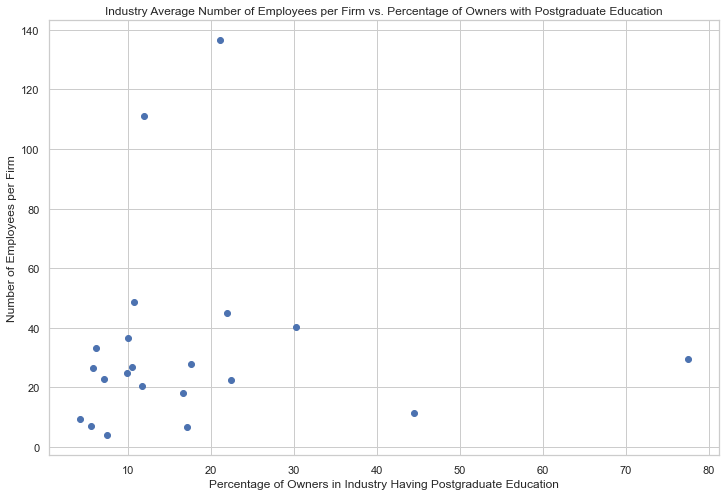

In [9]:
sns.set_theme(style='whitegrid')
plt.figure(figsize=(12, 8))
plt.scatter(scatter_data['OWNPDEMP_PCT'], scatter_data['EMP_PER_FIRM'], c='b')

plt.xlabel("Percentage of Owners in Industry Having Postgraduate Education")
plt.ylabel("Number of Employees per Firm")
plt.title("Industry Average Number of Employees per Firm vs. Percentage of Owners with Postgraduate Education")
plt.show()